# Skip-gram

Results using Skip-gram model from word2vec paper: https://arxiv.org/abs/1310.4546. Negative sampling was used for optimized learning.

As we are using NLP model, dependencies of one package are treated as sentence, each dependency being one word.

Choosing best model parameters is complicated because of absence of empirical metric.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import umap
from package2vec.utils.closest_packages import print_closest_packages
from package2vec.utils.co_mat import create_co_mat, print_common_packages

%matplotlib inline

In [2]:
# Get co-occurence matrix for comparison with learned vectors
file_path = 'data/processed/requirements_mc2.csv'
co_mat, word2id = create_co_mat(file_path)

100%|██████████| 39506/39506 [08:53<00:00, 74.06it/s]


## Training on whole dataset

**Whole dataset**: packages with only 1 dependency filtered out, packages occuring only once as dependency filtered out (min_count=2).

Below are embeddings learned by skipgram model with following parameters:

|Embedding dimension|Negative samples (sampled during negative sampling)|Min count|
| :---:  | :---: | :---: |
| 100 | 5 | 2 |

**Embedding dimension** does not have significant effect on results. Using **5 negative samples**, the embeddings seem to capture the co-occurence of packages best (by comparing closest (euclidean distance) packages in embedded space and the most co-occuring packages). **Min count** is set to **2** to train the model on whole dataset, using **min count 1** results in dataset with lot of packages with low occurence and embeddings are noisy. 

In [3]:
# Load learned vectors
learned_vectors = pd.read_csv('models/skipgram_whole_dataset/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=15)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

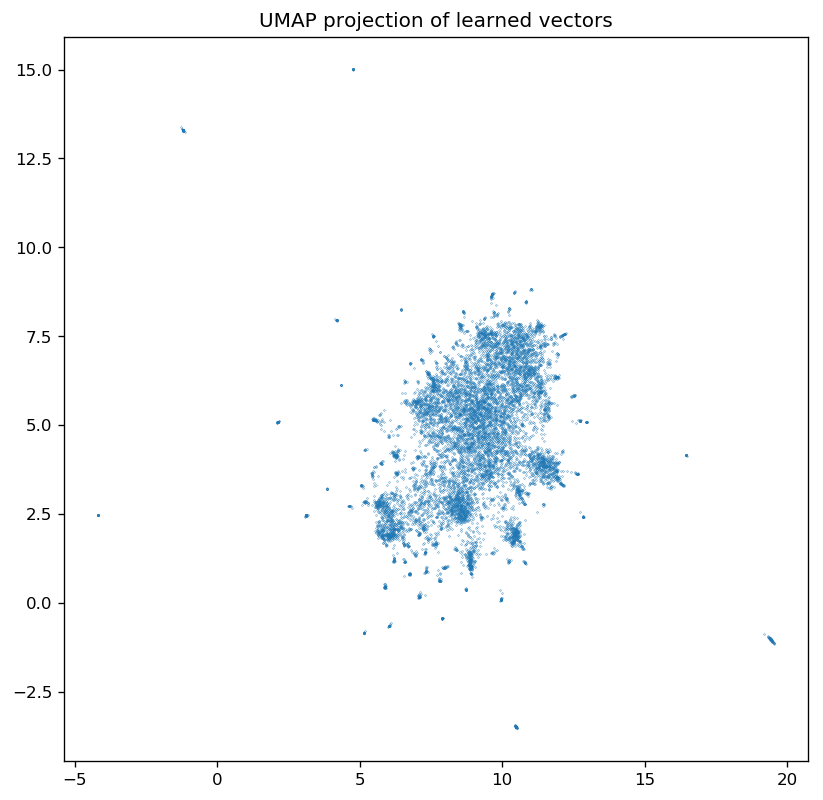

In [4]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.05)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

Above is a plot of learned vectors fitted to 2D using UMAP projections with **number of neighbours** set to **5**.

Looking at the plot, there are some structures forming. Using https://projector.tensorflow.org/, it's easy to see, that most of those clusters are formed by packages closest together in the embedded (100dim) space.

---

Comparing euclidean distances in learned 100 dimensional space and co-occurence (using co-occurence matrix), we can see some overlap between most co-occuring packages and closest packages in embedded space.

In [5]:
file_path = 'models/skipgram_whole_dataset/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scikit-learn
tqdm
matplotlib
pyyaml
pandas

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [6]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
torchvision
scikit-learn
joblib
tqdm
seaborn

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [7]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
tensorflow-gpu
h5py
scikit-learn
matplotlib

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [8]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
matplotlib
scikit-learn
scipy
seaborn
pyyaml

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn


---

## Training on filtered data

There is large number of packages occuring only a few times as dependency. Filtering those out might create dataset representing the relations of packages better. Packages with low occurence would propably be of low interest for practical use.

All packages occuring less than **10** times as dependency in the dataset were filtered out for this model.

Model was trained with following configurations.

|Embedding dimension|Negative samples (sampled during negative sampling|Min count|
| :---: | :---: | :---: |
| 100 | 5 | 10 |


Using bigger value of **min count**, the number of unique packages in dataset (size vocabulary) is getting quite small (**1251** for min_count = 20 and **704** for min_count = 40) and the results are similar.

In [9]:
# Load learned vectors
learned_vectors = pd.read_csv('models/skipgram_min_count10/vectors.tsv', sep='\t', header=None)
learned_vectors = learned_vectors.values

# Fit learned vectors to 2 dimension using UMAP
reducer = umap.UMAP(n_neighbors=5)
embedding = reducer.fit_transform(learned_vectors)

Text(0.5, 1.0, 'UMAP projection of learned vectors')

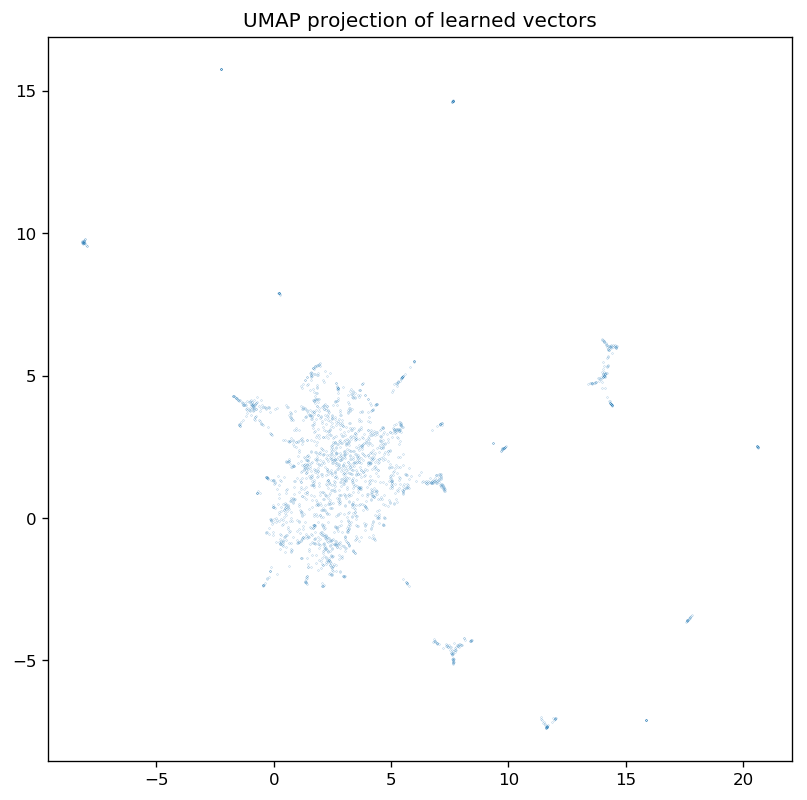

In [10]:
# Plot embedded learned vectors
plt.figure(figsize=(8, 8), dpi=120)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s = 0.01)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of learned vectors')

Above is a plot of learned vectors fitted to 2D using UMAP projections with **number of neighbours** set to **5**.

Some structures are forming again. There are less datapoints _'in between'_. The situation is better seen using the  https://projector.tensorflow.org/ tool.

---

Again, we can see an overlap between most co-occuring packages and closest packages in embedded space.

In [11]:
file_path = 'models/skipgram_min_count10/'
ret = print_closest_packages(file_path = file_path, word = 'numpy', k = 5)
print()
print_common_packages(co_mat, word2id, 'numpy', n=5)

5 closest packages to numpy:
---
scikit-learn
joblib
matplotlib
pyparsing
seaborn

5 packages co-occuring most with numpy:
---
scipy
pandas
matplotlib
pytest
scikit-learn


In [12]:
ret = print_closest_packages(file_path = file_path, word = 'torch', k = 5)
print()
print_common_packages(co_mat, word2id, 'torch', n=5)

5 closest packages to torch:
---
joblib
torchvision
scikit-learn
sklearn
jupyter

5 packages co-occuring most with torch:
---
numpy
tqdm
torchvision
scipy
matplotlib


In [13]:
ret = print_closest_packages(file_path = file_path, word = 'tensorflow', k = 5)
print()
print_common_packages(co_mat, word2id, 'tensorflow', n=5)

5 closest packages to tensorflow:
---
keras
absl-py
h5py
protobuf
matplotlib

5 packages co-occuring most with tensorflow:
---
numpy
keras
matplotlib
scipy
pandas


In [14]:
ret = print_closest_packages(file_path = file_path, word = 'pandas', k = 5)
print()
print_common_packages(co_mat, word2id, 'pandas', n=5)

5 closest packages to pandas:
---
scikit-learn
joblib
scipy
matplotlib
seaborn

5 packages co-occuring most with pandas:
---
numpy
scipy
matplotlib
requests
scikit-learn
